Notebook for testing nn performance

[(0.0, 0.0), (0.0161, 7.46e-05), (0.0709, 0.000329), (0.125582, 0.000584), (0.180231, 0.000838), (0.234808, 0.00109), (0.289311, 0.00135), (0.343741, 0.0016), (0.398099, 0.00186), (0.452384, 0.00211), (0.506597, 0.00237), (0.58932, 0.00275), (0.740654, 0.00347), (0.891427, 0.00418), (1.041643, 0.0049), (1.191305, 0.00561), (1.340418, 0.00632), (1.488984, 0.00704), (1.637007, 0.00775), (1.784492, 0.00847), (1.931441, 0.00918), (2.096868, 0.00999), (2.307293, 0.011), (2.516628, 0.012), (2.724883, 0.0131), (2.932067, 0.0141), (3.138192, 0.0151), (3.343266, 0.0162), (3.5473, 0.0172), (3.750304, 0.0182), (3.952287, 0.0193), (4.159156, 0.0203), (4.379123, 0.0215), (4.59789, 0.0226), (4.815468, 0.0237), (5.031871, 0.0249), (5.24711, 0.026), (5.461198, 0.0271), (5.674144, 0.0283), (5.885962, 0.0294), (6.096663, 0.0305), (6.24499, 0.0316), (6.320205, 0.0326), (6.395337, 0.0336), (6.470317, 0.0346), (6.545148, 0.0356), (6.619829, 0.0366), (6.694361, 0.0375), (6.768747, 0.0385), (6.842986, 0.0395

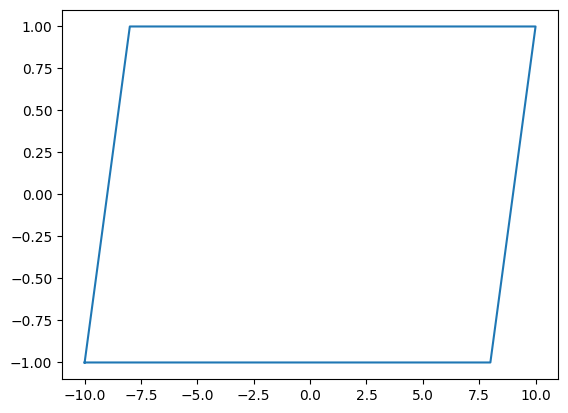

In [1]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [2]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse


# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [3]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [4]:
# Load data for training
raw_train_data = extract_csv_info("./data_simulated/M19_29Gauge - Sheet1.csv")
# format into (current H, current B, next H, next B)
formatted_data = format_data(raw_train_data)
#train, test = shuffle_and_split(formatted_data)
train_x, train_y = split_input_output(formatted_data)
#test_x, test_y = split_input_output(test)
print(len(train_x))

2000


In [5]:
# Load data for testing
raw_test_data = extract_csv_info("./data_simulated/M19_TESTINGDATA - M19_TESTINGDATA.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])

print(len(test_next_h))
print(len(test_x))

1177
1177


## Feedforward Network

In [ ]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

In [ ]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [ ]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

In [ ]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")

## Preisach Network

In [ ]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(train_x, train_y, "preisach.model", n_epochs=20)

In [ ]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [ ]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(test_x)
mse = compute_mse(test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(test_x, test_y)

In [ ]:
# Plot Preisach output
plot_predicted(test_next_h, pnn_prediction, "Preisach Network")

## Recurrent Network
no stop activation layer

In [ ]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

In [ ]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [ ]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)

## Recurrent Preisach Network
includes stop activation layer

In [6]:
# Generate and train recurrent preisach network
rnn_model = train_and_generate_recurrent_preisach_network(train_x[0:1984], train_y[0:1984], "recurrent_preisach.model", n_epochs=20)

Epoch 1/20
(32, 1)
(32, 1)


InaccessibleTensorError: in user code:

    File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    InaccessibleTensorError: Exception encountered when calling layer "recurrent_preisach_layer" "                 f"(type RecurrentPreisachLayer).
    
    in user code:
    
        File "C:\Users\chris\git\ecse458_plotter\custom_activation.py", line 68, in call  *
            output = tf.convert_to_tensor(output)
    
        InaccessibleTensorError: <tf.Tensor 'while/Minimum:0' shape=(1,) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
        Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.
        
        <tf.Tensor 'while/Minimum:0' shape=(1,) dtype=float32> was defined here:
            File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 194, in _run_module_as_main
              return _run_code(code, main_globals, None,
            File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
              exec(code, run_globals)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
              app.launch_new_instance()
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
              app.start()
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
              self.io_loop.start()
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
              self.asyncio_loop.run_forever()
            File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 570, in run_forever
              self._run_once()
            File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1859, in _run_once
              handle._run()
            File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 81, in _run
              self._context.run(self._callback, *self._args)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
              await self.process_one()
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
              await dispatch(*args)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
              await result
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
              reply_content = await reply_content
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
              res = shell.run_cell(
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
              return super().run_cell(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
              result = self._run_cell(
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
              return runner(coro)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
              coro.send(None)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
              has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
              if await self.run_code(code, result, async_=asy):
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
              exec(code_obj, self.user_global_ns, self.user_ns)
            File "C:\Users\chris\AppData\Local\Temp\ipykernel_2572\926968300.py", line 2, in <module>
              rnn_model = train_and_generate_recurrent_preisach_network(train_x[0:1984], train_y[0:1984], "recurrent_preisach.model", n_epochs=20)
            File "C:\Users\chris\git\ecse458_plotter\neural.py", line 144, in train_and_generate_recurrent_preisach_network
              model.fit(x_train, y_train, epochs=n_epochs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
              return fn(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1564, in fit
              tmp_logs = self.train_function(iterator)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function
              return step_function(self, iterator)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function
              outputs = model.distribute_strategy.run(run_step, args=(data,))
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step
              outputs = model.train_step(data)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
              y_pred = self(x, training=True)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
              return fn(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\training.py", line 557, in __call__
              return super().__call__(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
              return fn(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
              outputs = call_fn(inputs, *args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
              return fn(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\sequential.py", line 425, in call
              outputs = layer(inputs, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
              return fn(*args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
              outputs = call_fn(inputs, *args, **kwargs)
            File "c:\users\chris\git\ecse458_plotter\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
              return fn(*args, **kwargs)
            File "C:\Users\chris\git\ecse458_plotter\custom_activation.py", line 57, in call
              for i in input:
            File "C:\Users\chris\git\ecse458_plotter\custom_activation.py", line 61, in call
              e = tf.math.minimum(ones, tf.math.maximum(neg_ones, sum))
        
        The tensor <tf.Tensor 'while/Minimum:0' shape=(1,) dtype=float32> cannot be accessed from FuncGraph(name=call, id=1511602919744), because it was defined in FuncGraph(name=while_body_229, id=1511593155984), which is out of scope.
    
    
    Call arguments received by layer "recurrent_preisach_layer" "                 f"(type RecurrentPreisachLayer):
      • input=tf.Tensor(shape=(32, 1), dtype=float32)
      • mask=None


36/36 [==============================] - 0s 1ms/step


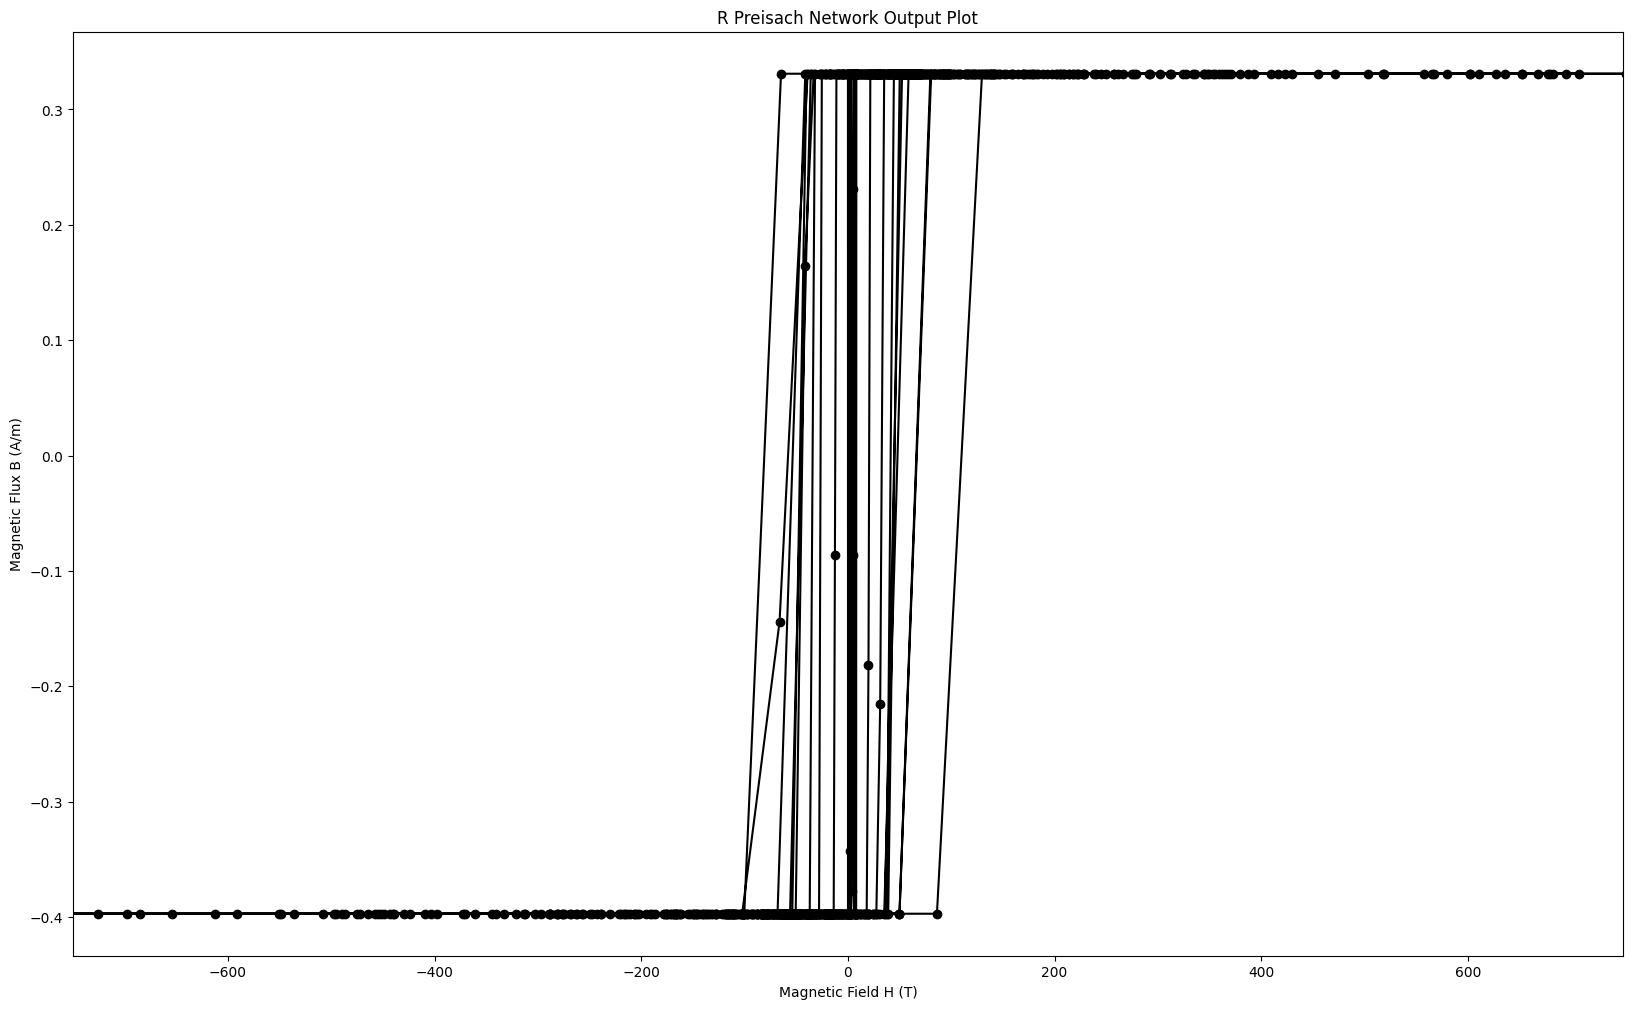

In [7]:
rnn_prediction = rnn_model.predict(test_x[0:1152])
plot_predicted(test_next_h[0:1152], rnn_prediction[0:1152], "R Preisach Network")